---
layout: post
title:  "K neareast neighbors"
date:   2023-04-06 10:14:54 +0700
categories: MachineLearning
---

# Introduction

K nearest neighbor is a simple algorithm in which the machine simply store the dataset (memorize it). $$ (x^{(i)}, y^{(i)}) \in D (\mid D \mid = n) $$

When a new data point comes in, it calculate the (could be weighted) distance to the closest data points (hence the name nearest neighbors) and assign a value. Since the process of training data is delayed til inference, it is call a lazy learning algorithm. Plus that the algorithm is to compare the new data point with current data points in the training set, it is called an instance based method. Further, without a functional form of the prediction phase, this is a non parametric model. For the classification task, it will assign the most voted label to the new point. For a regression task, it will take the average of the neighbors to be the prediction for that point. Those neighbors' values can be treated equally (uniformly) or weighted. More neighbors considered, smoother the decision boundary would become. 

The simpliticy, together with its lack of assumptions about the underlying data distribution are KNN advantanges.
However, it can be computationally expensive to find the nearest neighbors in high-dimensional feature spaces and can be sensitive to the choice of distance metric leading to performance deteroriates.

## Classification
The word majority vote assumes a voting threshold of bigger than 50%, but in case of multiple classes, a three classe setting for example, you might just need as much as 34% to be the highest vote. So it is actually a plurality vote.

Let's say we have c classes and a function to turn data point into label: $$ f(x) = y \in \{1,...,c\} $$. When we have a query point x, we find its k nearest neighbors:

$$ D_k = \{(x^1, f(x^1)), ...(x^k, f(x^k))\} $$

### Distance

KNN assumes that similar points tend to be near each other and there are different ways to measure distance and decide who is neighbors of whom.  The default distance to decide neighbor status is the Euclidean distance (or a $$ L_2 $$ distance) between 2 points is:

$$ d(x^1, x^2) = \sqrt{\sum_{j=1}^{m} (x_{j}^{1} - x_{j}^{2})^2} $$

We can also use the $$ L_1 $$ distance (absolute distance) that emphasizes the distance or outliers less than the $$ L_2 $$ distance.

$$ d(x^1, x^2) = \sum_{j=1}^{m} \mid x^1 - x^ 2 \mid $$

A generalized version of $$ L_1 $$ and $$ L_2 $$ distance is called Minkowski distance, 

$$ d(x^1,x^2) = {[ \sum_{j=1}^{m} (\mid x^1 - x^2\mid)^p ]}^{\frac{1}{p}} $$ with p = 1 for the $$ L_1 $$ distance and p = 2 for the $$ L_2 $$ distance.

For discrete features, we can use Hamming distance which count the number of elements that are different in the two vectors (assuming that the data point can be represented in vectorized form). For example $$ x^1 $$ = [0 1 1 1] and $$ x^2 $$ = [0 1 0 1], according to Hamming distance, we have only one position in which the two points differ (the third element of 0 in $$ x^1 $$ and 1 in $$ x^2 $$), so the Hamming distance is 1. The Hamming distance is also called overlap metric.

If we are working with text, to measure the similarity (or distance) between two documents, we can use cosine similarity. This could be more appropriate than the euclidean distance. The cosine similarity is the dot product between two vectors normalized by their magnitude.

$$ cos(\theta) = \frac{a^T . b}{\mid\mid a \mid\mid . \mid \mid b \mid \mid} $$

We can even weight the distance in each dimension differently, this is equivalent to feature scaling. In the case of the Euclidean distance, we can do as follows:

$$ d_w(x^1,x^2) = \sqrt{\sum_{j=1}^{m} w_j (x_{j}^{1} - x_{j}^{2})^2} $$

Let's express the Euclidean distance as the dot product of the distance vector x: $$ d(x^1,x^2) = \sqrt{(x^1 - x^2)^T(x^1 - x^2)} $$ and W to be the diagonal matrix consisting of coefficient for the features, the distance weighted Euclidean distance becomes:

$$ d_w(x^1,x^2) = \sqrt{(x^1-x^2)^T W (x^1-x^2)} $$


## Hypothesis

Then the KNN hypothesis is to find x a label so that it maximizes a Krocker delta function:

$$ h(x) = arg max_{y \in \{1,...,c\}} \sum_{i=1}^{k} \delta(y, f(x^i)) $$

with $$ \delta(a,b) = 
\begin{cases}
        1 & \text{if a = b}, \\
        0 & \text{if a $\not =$ b}\\
\end{cases}
$$

The above function is equivalent to getting the mode (most frequent) value of the k neighbors:

$$ h(x) = mode(\{ f(x^1), f(x^2),..f(x^k) \}) $$

However, in some cases, we might want to weight different data points differently. For example, a farther neighbor would contribute less to the vote than a closer neighbor. To do this, we add weight ($$ \phi $$) for each delta function:

$$ h(x) = arg max_{j \in \{1,..,p\}} \sum_{i=1}^{k} \phi^i \delta(y, f(x^i)) $$

A popular weighting scheme is the inverse squared distance:

$$ \phi^i = \frac{1}{d(x^i, x)^2} $$

## Regression

For y to be a continuous value instead of a label, we take the mean (or median) of the k neighbors:

$$ h(x) = \frac{1}{k} \sum_{i=1}^{k} f(x^i) $$

A weighted distance prediction would be:

$$ h(x) = \frac{\sum_{i=1}^{k} \phi^i f(x^i)}{\sum_{i=1}^{k} \phi^{i}} $$


# Application

KNN algorithm can be used for a range of purposes:

- Data preprocessing: it can fill in the missing values by giving it the most frequent values in its neighborhood (based on distance)

- Recommendation engines: KNN can also recommend products if you are buying such and such. But this approach might not scale well since KNN sufferes severely from the curse of dimensionality. The curse of dimensionality is the situation in which we have a fixed size of the dataset but the dimensions increase and its complexity increases in a large and strange way.

- Finance: It can be used in case to determine whether a loan application is okay for lending or not.

- Healthcare: KNN can also make prediction on risk of heart attack and cancer.

- Pattern recognition: We would try KNN for the digit recognition task, with the MNIST dataset as follows:

In [2]:
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
mnist = fetch_openml('mnist_784')

/Users/nguyenlinhchi/.local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X=mnist['data']
y=mnist['target']

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.9418571428571428


In [8]:
grid_space={'n_neighbors':[1,2,4,5,10]
           }
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(neigh,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'n_neighbors': 1}
Best score is: 0.940928583508461


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
grid_space={'n_neighbors':[1,2,4,5,10]}
grid = GridSearchCV(neigh,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'n_neighbors': 1}
Best score is: 0.9523809523809524


In [11]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.5 MB/s eta 0:00:00a 0:00:010m


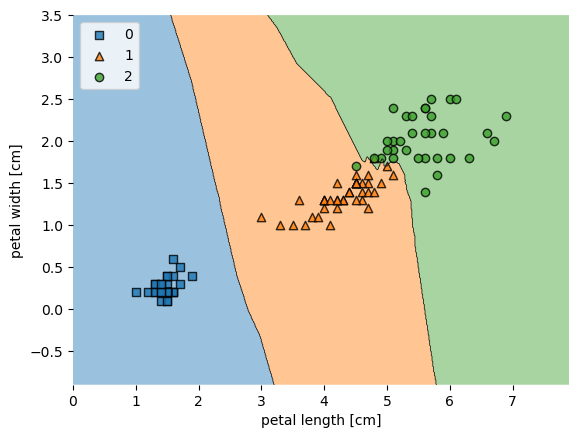

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()